In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import os
import matplotlib.pyplot as plt

data_dir = './data.csv'

In [3]:
if os.path.exists(data_dir):
    df = pd.read_csv(data_dir, names=['title', 'pre-discount-price', 'sale-price', 'positive-review-percent', 'num-reviews', 'review-class', 'date-released'])
    print(df)
else:
    print('[INFO] Data path does not exist.')

                                                   title  pre-discount-price  \
0                                         Lethal Company                8.50   
1                                        Baldur's Gate 3               49.99   
2                                       Counter-Strike 2                0.00   
3                                        House Flipper 2               32.49   
4                                                   Rust               34.99   
...                                                  ...                 ...   
29204                                    Shell's Kitchen                0.00   
29205                                       Retro Combat                0.00   
29206           Touhou Meijinka ~ Song of Divine Tempest                0.00   
29207                              DOMINO The Little One                0.00   
29208  The Curse of the Egyptian Pyramid &quot;Remast...                0.00   

       sale-price  positive-review-perc

### Encode review-class feature

In [4]:
# le = LabelEncoder()

# review_class_en = le.fit_transform(df['review-class'])

# labels = {}
# print(df['review-class'].iloc[np.where(review_class_en == 0)[0][0]])
# for i in range(len(np.unique(review_class_en))):
#     labels[str(np.unique(review_class_en)[i])] = df['review-class'].iloc[np.where(review_class_en == i)[0][0]]
# print(labels)
# df['review-class'] = review_class_en.astype('int64')

df['review-class'].loc[df['review-class'] == 'Positive'] = 0
df['review-class'].loc[df['review-class'] == 'Mostly Positive'] = 1
df['review-class'].loc[df['review-class'] == 'Very Positive'] = 2
df['review-class'].loc[df['review-class'] == 'Overwhelmingly Positive'] = 3
print(df)

# df

                                                   title  pre-discount-price  \
0                                         Lethal Company                8.50   
1                                        Baldur's Gate 3               49.99   
2                                       Counter-Strike 2                0.00   
3                                        House Flipper 2               32.49   
4                                                   Rust               34.99   
...                                                  ...                 ...   
29204                                    Shell's Kitchen                0.00   
29205                                       Retro Combat                0.00   
29206           Touhou Meijinka ~ Song of Divine Tempest                0.00   
29207                              DOMINO The Little One                0.00   
29208  The Curse of the Egyptian Pyramid &quot;Remast...                0.00   

       sale-price  positive-review-perc

C:\Users\mcurt\AppData\Local\Temp\ipykernel_12416\1988246119.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review-class'].loc[df['review-class'] == 'Positive'] = 0
C:\Users\mcurt\AppData\Local\Temp\ipykernel_12416\1988246119.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review-class'].loc[df['review-class'] == 'Mostly Positive'] = 1
C:\Users\mcurt\AppData\Local\Temp\ipykernel_12416\1988246119.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

0     1997
1     1998
2     1999
3     2000
4     2001
5     2002
6     2003
7     2004
8     2005
9     2006
10    2007
11    2008
12    2009
13    2010
14    2011
15    2012
16    2013
17    2014
18    2015
19    2016
20    2017
21    2018
22    2019
23    2020
24    2021
25    2022
26    2023
Name: date-released, dtype: int32
                   date-released review-class
3  2000-11-01 00:00:00.000000000          2.5
8  2005-08-26 12:00:00.000000000          1.5
13 2010-07-09 04:01:32.903225856     1.651613
18 2015-07-10 13:39:17.446808576     1.408195
23 2020-07-10 18:35:27.417923840     1.098196


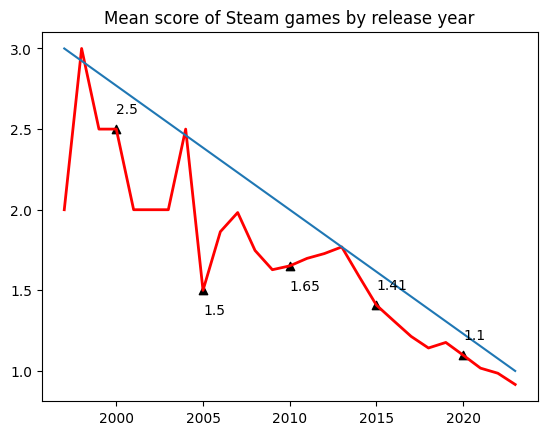

2.5


In [90]:
df['date-released'] = pd.to_datetime(df['date-released'])
# print(df.dtypes)
d = df[['date-released', 'review-class']]
score_per_year = d.groupby(d['date-released'].dt.year, as_index=False).mean()
# score_per_year.columns = ['year-released', 'mean-score']
print(score_per_year['date-released'].dt.year)

fifth_year = score_per_year.loc[[3,8,13,18,23]]
print(fifth_year)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(fifth_year['date-released'].dt.year, fifth_year['review-class'], marker='^', c='black')
plt.plot(score_per_year['date-released'].dt.year, score_per_year['review-class'], linewidth=2, linestyle='-', color='red')
plt.plot(np.linspace(1997,2023,26), 3-2/26*np.linspace(0,26,26)) 
# for i in range(len(fifth_year)):

ax.annotate(str(round(fifth_year['review-class'].iloc[0],2)), xy=(fifth_year['date-released'].dt.year.iloc[0],fifth_year['review-class'].iloc[0]+0.1))
ax.annotate(str(round(fifth_year['review-class'].iloc[1],2)), xy=(fifth_year['date-released'].dt.year.iloc[1],fifth_year['review-class'].iloc[1]-0.15))
ax.annotate(str(round(fifth_year['review-class'].iloc[2],2)), xy=(fifth_year['date-released'].dt.year.iloc[2],fifth_year['review-class'].iloc[2]-0.15))
ax.annotate(str(round(fifth_year['review-class'].iloc[3],2)), xy=(fifth_year['date-released'].dt.year.iloc[3],fifth_year['review-class'].iloc[3]+0.1))
ax.annotate(str(round(fifth_year['review-class'].iloc[4],2)), xy=(fifth_year['date-released'].dt.year.iloc[4],fifth_year['review-class'].iloc[4]+0.1))
plt.title('Mean score of Steam games by release year')
plt.show()
print(fifth_year['review-class'].iloc[0])

0     1997
1     1998
2     1999
3     2000
4     2001
5     2002
6     2003
7     2004
8     2005
9     2006
10    2007
11    2008
12    2009
13    2010
14    2011
15    2012
16    2013
17    2014
18    2015
19    2016
20    2017
21    2018
22    2019
23    2020
24    2021
25    2022
26    2023
Name: date-released, dtype: int32
                   date-released  sale-price
3  2000-11-01 00:00:00.000000000    5.740000
8  2005-08-26 12:00:00.000000000    3.390000
13 2010-07-09 04:01:32.903225856    6.846903
18 2015-07-10 13:39:17.446808576    6.651907
23 2020-07-10 18:35:27.417923840    6.461080


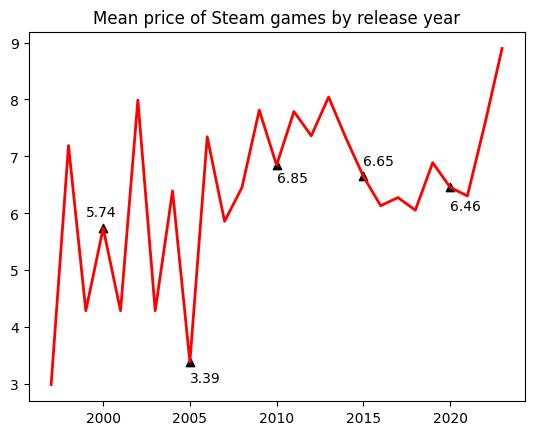

5.74


In [99]:
d = df[['date-released', 'sale-price']]
price_per_year = d.groupby(d['date-released'].dt.year, as_index=False).mean()
# score_per_year.columns = ['year-released', 'mean-score']
print(price_per_year['date-released'].dt.year)

fifth_year = price_per_year.loc[[3,8,13,18,23]]
print(fifth_year)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(fifth_year['date-released'].dt.year, fifth_year['sale-price'], marker='^', c='black')
plt.plot(price_per_year['date-released'].dt.year, price_per_year['sale-price'], linewidth=2, linestyle='-', color='red')

ax.annotate(str(round(fifth_year['sale-price'].iloc[0],2)), xy=(fifth_year['date-released'].dt.year.iloc[0]-1,fifth_year['sale-price'].iloc[0]+0.2))
ax.annotate(str(round(fifth_year['sale-price'].iloc[1],2)), xy=(fifth_year['date-released'].dt.year.iloc[1],fifth_year['sale-price'].iloc[1]-0.35))
ax.annotate(str(round(fifth_year['sale-price'].iloc[2],2)), xy=(fifth_year['date-released'].dt.year.iloc[2],fifth_year['sale-price'].iloc[2]-0.3))
ax.annotate(str(round(fifth_year['sale-price'].iloc[3],2)), xy=(fifth_year['date-released'].dt.year.iloc[3],fifth_year['sale-price'].iloc[3]+0.2))
ax.annotate(str(round(fifth_year['sale-price'].iloc[4],2)), xy=(fifth_year['date-released'].dt.year.iloc[4],fifth_year['sale-price'].iloc[4]-0.4))
plt.title('Mean price of Steam games by release year')
plt.show()
print(fifth_year['sale-price'].iloc[0])